In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
gfw = GravityFramework.GravityFramework()

In [41]:
import datetime as dt

def get_temperature_and_pressure(date,from_hour,to_hour):
    f=[]
    for i in np.arange(from_hour,to_hour+1,1):
        if(i<10):
            hour = "0%d" %i
        if(i>9):
            hour ="%d" %i
        f.append(h5py.File("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s.hdf5" %(date,date,hour)))
        print("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s.hdf5" %(date,date,hour))
    airtemperature_list = []
    surfacetemperature_list = []
    pressure_list = []
    for i in np.arange(0,len(f),1):
        airtemperature_list.extend(list(f[i]["AirTemperature/AirTemperatures"]))
        surfacetemperature_list.extend(list(f[i]["SurfaceTemperature/SurfaceTemperatures"]))
        pressure_list.extend(list(f[i]["Pressure/Pressures"]))
    [f_.close() for f_ in f] ## good programing       
    return airtemperature_list, surfacetemperature_list, pressure_list

def from_timestamp_to_temperature(start_time,end_time):
    transform_time_start = dt.datetime.fromtimestamp(start_time/1e9)
    print()
    transform_time_end = dt.datetime.fromtimestamp(end_time/1e9)
    year = "%d" %transform_time_start.year
    if(transform_time_start.month<10):month="0"+ "%d"%transform_time_start.month
    else:month="%d"%transform_time_start.month
    if(transform_time_start.day<10):day="0"+ "%d"%transform_time_start.day
    else:day="%d"%transform_time_start.day
    date = year + month + day
    from_hour = transform_time_start.hour
    to_hour = transform_time_end.hour
    print(date,from_hour,to_hour)
    airtemperature_list, surfacetemperature_list, pressure_list = get_temperature_and_pressure(date,from_hour,to_hour)
    starting_point = transform_time_start.minute * 60 + transform_time_start.second
    end_point = (to_hour-from_hour)*3600 + transform_time_end.minute * 60 + transform_time_end.second
    print(starting_point,end_point)
    return airtemperature_list[starting_point:end_point], surfacetemperature_list[starting_point:end_point], pressure_list[starting_point:end_point]

### Load data

In [113]:
foldername = r'/data/new_trap/20200107/Bead1/Response/'
bdfs = load_dir(foldername)

260  files in folder
260  files loaded


In [114]:
response_x2 = [np.std(bb.response_at_freq2('x',151)) for bb in bdfs]
response_x3 = [np.std(bb.response_at_freq3('x',151)) for bb in bdfs]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [119]:
temperature_air, surf, pressure = from_timestamp_to_temperature(bdfs[80].time[0], bdfs[-1].time[-1])


20200107 14 15
/data/SC_data/TemperatureAndPressure20200107/TempAndPressure20200107_14.hdf5
/data/SC_data/TemperatureAndPressure20200107/TempAndPressure20200107_15.hdf5
2391 4771


In [120]:
pos_z = [np.mean(bb.feedback[2]) for bb in bdfs]
quad_sum = [np.mean(bb.quad_sum) for bb in bdfs]
diff_phase = [np.mean(bb.phase[0])-np.mean(bb.phase[1]) for bb in bdfs]

<IPython.core.display.Javascript object>


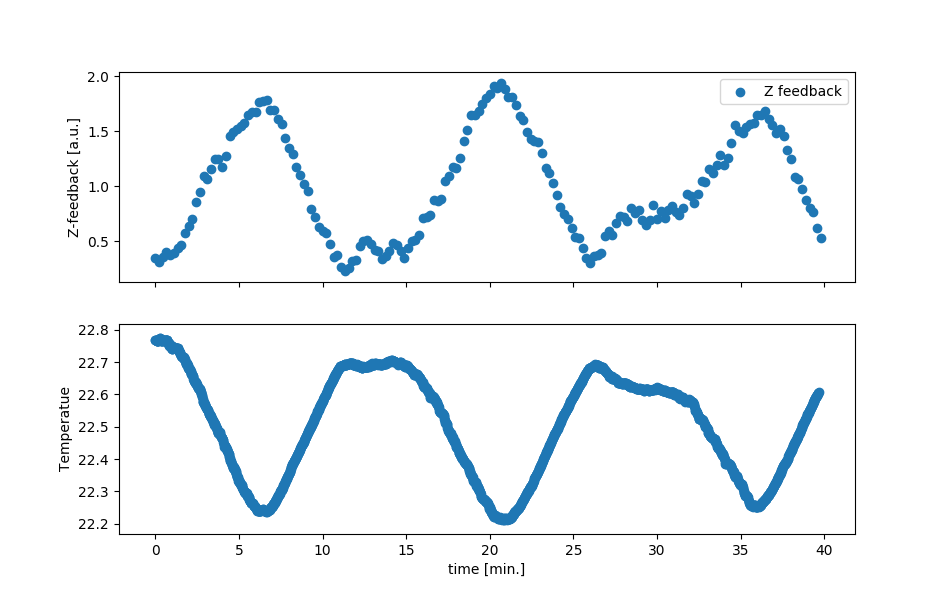

In [127]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
# ax[0].scatter(np.arange(180)*10/60*4/3,response_x2[80:]/np.mean(response_x2[80:]),label='X2 response')
# ax[0].scatter(np.arange(180)*10/60*4/3,response_x3[80:]/np.mean(response_x3[80:]),label='X3 response')
ax[0].scatter(np.arange(180)*10/60*4/3,pos_z[80:]/np.mean(pos_z[80:]),label='Z feedback')
# ax[0].scatter(np.arange(180)*10/60*4/3,diff_phase[80:]/np.mean(diff_phase[80:]),label='diff phase')
ax[1].scatter(np.arange(len(temperature_air))/60,temperature_air,label='temperature')
ax[1].set(xlabel='time [min.]', ylabel='Temperatue')
ax[0].set(ylabel='Z-feedback [a.u.]')
ax[0].legend()

In [129]:
foldename = r'/data/new_trap/20200107/Bead3/Response/'
bdfs_resp = load_dir(dirname=foldename)

360  files in folder
360  files loaded


In [140]:
res_x2 = [np.std(bb.response_at_freq2('x',151)) for bb in bdfs_resp]
res_x3 = [np.std(bb.response_at_freq3('x',151)) for bb in bdfs_resp]
z_feedback = [np.mean(bb.feedback[2]) for bb in bdfs_resp]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [141]:
len(res_x2)

360

<IPython.core.display.Javascript object>


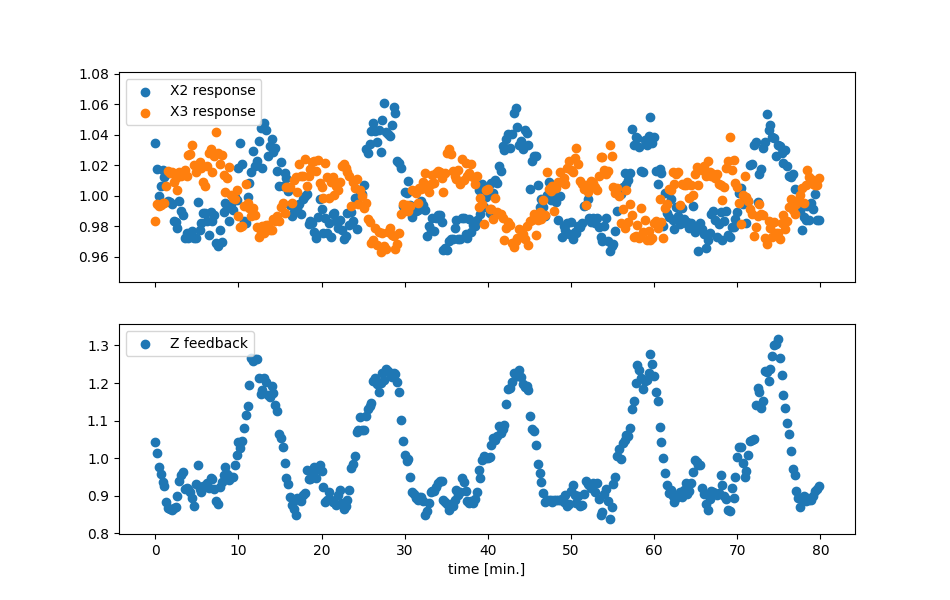

[Text(0.5, 0, 'time [min.]')]

In [143]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
ax[0].scatter(np.arange(360)*10/60*4/3,res_x2/np.mean(res_x2),label='X2 response')
ax[0].scatter(np.arange(360)*10/60*4/3,res_x3/np.mean(res_x3),label='X3 response')
ax[1].scatter(np.arange(360)*10/60*4/3,z_feedback/np.mean(z_feedback),label='Z feedback')
[a.legend() for a in ax]
ax[1].set(xlabel='time [min.]')

In [84]:
foldername = r'/home/data_transfer/data_from_windows/20200107/Bead3/HeightResponse/'
bdfs_hieght = load_dir(dirname=foldername)

9  files in folder
9  files loaded


<IPython.core.display.Javascript object>


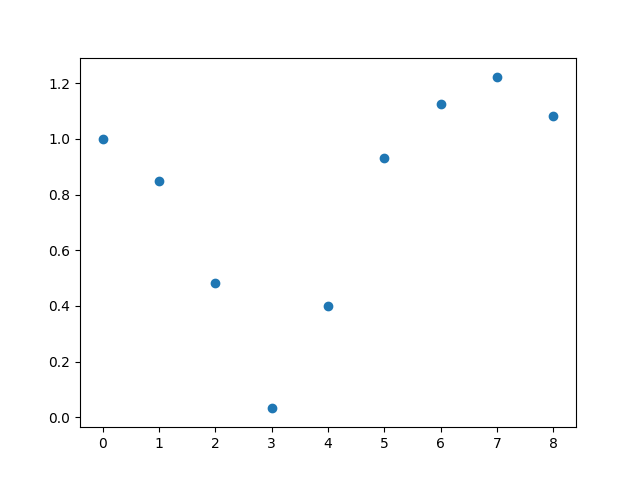

In [89]:
pos_z = [np.mean(bb.feedback[2]) for bb in bdfs_hieght]
_, ax = plt.subplots()
ax.scatter(range(len(pos_z)),pos_z/pos_z[0])

In [93]:
import os
from scipy import misc
path = r'/home/data_transfer/data_from_windows/20200107/Bead3/HeightResponse/'
image200= misc.imread(os.path.join(path,'Z_set_200k.bmp'), flatten= 0)
image600= misc.imread(os.path.join(path,'Z_set_600k.bmp'), flatten= 0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


<IPython.core.display.Javascript object>


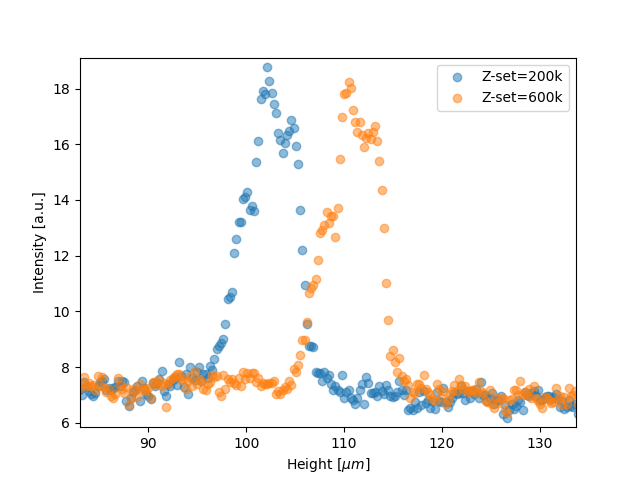

In [149]:
_,ax = plt.subplots()
ax.scatter(np.arange(1024)/1024*230.4, np.mean(image200, axis=1), alpha=0.5, label='Z-set=200k')
ax.scatter(np.arange(1024)/1024*230.4, np.mean(image600, axis=1), alpha=0.5, label='Z-set=600k')
ax.set(xlabel='Height [$\mu m$]', ylabel='Intensity [a.u.]')
ax.legend()

In [106]:
np.mean(image200, axis=1).shape, 230.4/1024, image200.shape

((1024,), 0.225, (1024, 1280))